In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [19]:
# Load preprocessed training and testing data
X_train = pd.read_csv("X_train_scaled.csv")
X_test = pd.read_csv("X_test_scaled.csv")
y_train = pd.read_csv("y_train.csv").squeeze()  # Convert to Series
y_test = pd.read_csv("y_test.csv").squeeze()

In [21]:
# Initialize and train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.8772727272727273

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85        74
           1       0.87      0.92      0.89        72
           2       0.88      0.91      0.89        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



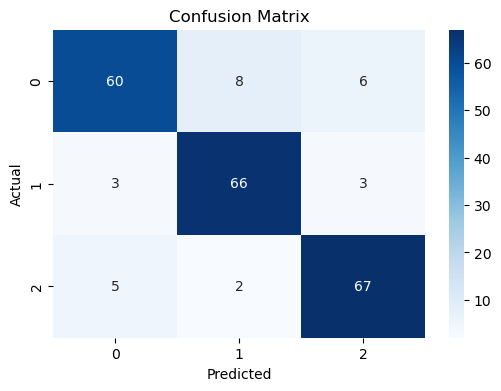

In [23]:
# Make predictions
y_pred = clf.predict(X_test)

# Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


===== Logistic Regression =====
Accuracy: 0.8818181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86        74
           1       0.89      0.92      0.90        72
           2       0.88      0.89      0.89        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



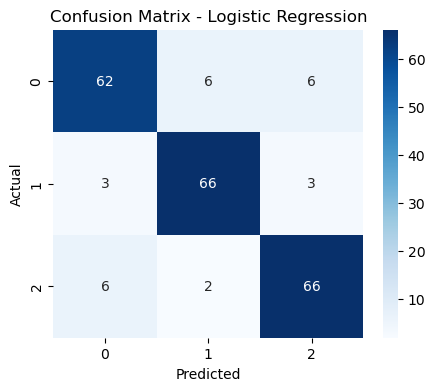


===== Random Forest =====
Accuracy: 0.8772727272727273
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85        74
           1       0.87      0.92      0.89        72
           2       0.88      0.91      0.89        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



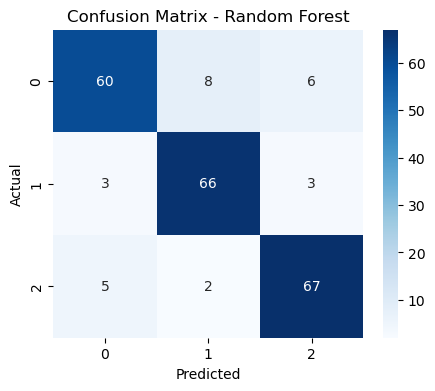


===== Support Vector Machine =====
Accuracy: 0.8681818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83        74
           1       0.89      0.92      0.90        72
           2       0.86      0.88      0.87        74

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



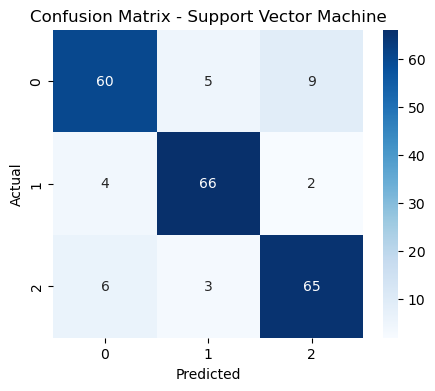


===== Gradient Boosting =====
Accuracy: 0.8590909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83        74
           1       0.84      0.93      0.88        72
           2       0.88      0.85      0.86        74

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



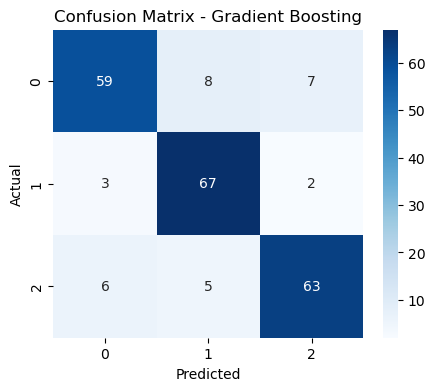


===== K-Nearest Neighbors =====
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86        74
           1       0.71      0.96      0.82        72
           2       0.95      0.82      0.88        74

    accuracy                           0.85       220
   macro avg       0.88      0.85      0.85       220
weighted avg       0.88      0.85      0.85       220



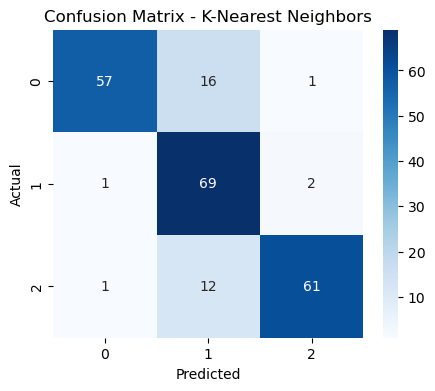

In [27]:
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()